In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# preview of city_data
city_data.head(3)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban


In [2]:
# preview of ride_data
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [73]:
# Combine the data into a single dataset
pyber_df = pd.merge(ride_data, city_data, on='city',indicator=True, how='left')

# Display the data table for preview
pyber_df.head()
pyber_df.to_csv('pyber_df.csv')

## Bubble Plot of Ride Sharing Data

In [4]:
# Obtain the x and y coordinates for each of the three city types
city_ride_count = pd.DataFrame(pyber_df.groupby(['type', 'city'])['ride_id'].count())
city_ride_count.columns = ['ride count']
city_ride_count.head()

ride count
type  city                      
Rural Bradshawfurt            10
      Garzaport                3
      Harringtonfort           6
      Jessicaport              6
      Lake Jamie               6

In [5]:
city_fare_mean = pd.DataFrame(pyber_df.groupby(['type', 'city'])['fare'].mean())
city_fare_mean.columns = ['average fare']
city_fare_mean.head()

average fare
type  city                        
Rural Bradshawfurt       40.064000
      Garzaport          24.123333
      Harringtonfort     33.470000
      Jessicaport        36.013333
      Lake Jamie         34.358333

In [6]:
driver_count = pd.DataFrame(pyber_df.groupby(['type', 'city'])['driver_count'].mean())
driver_count.columns = ['driver count']
driver_count.head()

driver count
type  city                        
Rural Bradshawfurt               7
      Garzaport                  7
      Harringtonfort             4
      Jessicaport                1
      Lake Jamie                 4

In [7]:
city_type_chart = pd.merge(city_ride_count, city_fare_mean, on=['type', 'city'], how='left')\
                    .merge(driver_count, on=['type', 'city'], how='left')
city_type_chart.head()

ride count  average fare  driver count
type  city                                                  
Rural Bradshawfurt            10     40.064000             7
      Garzaport                3     24.123333             7
      Harringtonfort           6     33.470000             4
      Jessicaport              6     36.013333             1
      Lake Jamie               6     34.358333             4

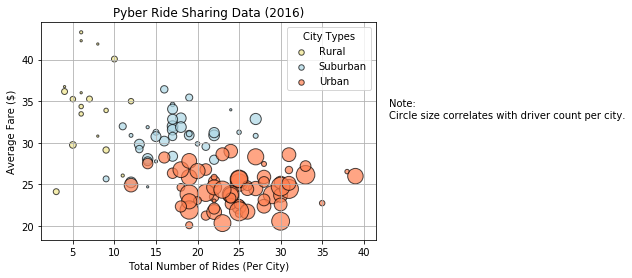

In [56]:
rural = plt.scatter(city_type_chart.loc['Rural', 'ride count'], 
                    city_type_chart.loc['Rural', 'average fare'], color="khaki", label="Rural", 
                    s= 5 * city_type_chart.loc['Rural', 'driver count'],
                    edgecolors="black", alpha=0.7
                   )

suburban = plt.scatter(city_type_chart.loc['Suburban', 'ride count'],
                       city_type_chart.loc['Suburban', 'average fare'], color="lightblue", label="Suburban",
                       s= 5 * city_type_chart.loc['Suburban', 'driver count'],
                       edgecolors="black", alpha=0.7
                      )

urban = plt.scatter(city_type_chart.loc['Urban', 'ride count'], 
                    city_type_chart.loc['Urban', 'average fare'], color="coral", label="Urban",
                    s= 5 * city_type_chart.loc['Urban', 'driver count'],
                    edgecolors="black", alpha=0.7
                   )

# Create legend and set size to 30
legend = plt.legend(title="City Types")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(43, 33, "Note:\nCircle size correlates with driver count per city.")
plt.show()

In [ ]:
# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

In [ ]:
# Show plot

## Total Fares by City Type

In [76]:
pyber_df.head()

,city,date,fare,ride_id,driver_count,type,_merge
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban,both
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban,both
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban,both
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban,both
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban,both


In [78]:
# Calculate Type Percents
total_fare_sum = pyber_df['fare'].sum()
rural_fare_sum = pyber_df.loc[pyber_df['type'] == "Rural" , 'fare'].sum()
suburban_fare_sum = pyber_df.loc[pyber_df['type'] == "Suburban" , 'fare'].sum()
urban_fare_sum = pyber_df.loc[pyber_df['type'] == "Urban" , 'fare'].sum()


0.0681149297498341


(-1.1133217498639854,
 1.2046187922122145,
 -1.096114159756932,
 1.1519223048259297)

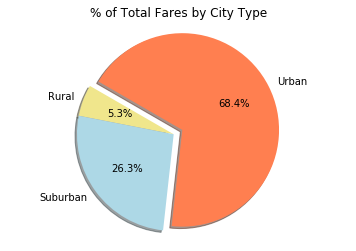

In [68]:
# Build Pie Chart
labels = ('Rural', 'Suburban', 'Urban')
sizes = (rural_rides_count, suburban_rides_count, urban_rides_count)
explode = (0,0,0.1)
colors = ('khaki','lightblue','coral')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        colors=colors,explode=explode, shadow=True, 
        startangle=150)

plt.title("% of Total Rides by City Type")
ax1.axis('equal')
# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

(-1.1133217498639854,
 1.2046187922122145,
 -1.096114159756932,
 1.1519223048259297)

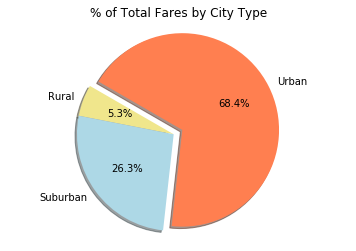

In [74]:
# Calculate Ride Percents
total_rides_count = pyber_df['ride_id'].count()
rural_rides_count = pyber_df.loc[pyber_df['type'] == "Rural" , 'type'].count()
suburban_rides_count = pyber_df.loc[pyber_df['type'] == "Suburban" , 'type'].count()
urban_rides_count = pyber_df.loc[pyber_df['type'] == "Urban" , 'type'].count()

# Build Pie Chart
labels = ('Rural', 'Suburban', 'Urban')
sizes = (rural_rides_count, suburban_rides_count, urban_rides_count)
explode = (0,0,0.1)
colors = ('khaki','lightblue','coral')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        colors=colors,explode=explode, shadow=True, 
        startangle=150)

plt.title("% of Total Fares by City Type")
ax1.axis('equal')

# Save Figure

# Calculate Type Percents

In [75]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()